<a href="https://colab.research.google.com/github/jeffreygalle/MAT421/blob/main/Module_B_Section_174_175.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#17.4  -  Lagrange Polynomial Interpolation
Given the data points: (x0, y0), (x1, y1), ..., (xn, yn) the Lagrange polynomial, L(x), passes through all of these points. The degree of L(x) will be n, when there (n+1) data points.

Example. Given points (1, 2), (3, 4), (5, 7), we will construct the Lagrange polynomial.
1.   Step 1 Find basis polynomials
2.   Step 2 combine basis polynomials

*   For (1, 2): (x-3)(x-5)/(1-3)(1-5) = (x-3)(x-5)/8
*   For (3, 4): (x-1)(x-5)/(3-1)(3-5) = -(x-1)(x-5)/4
*   For (5, 7): (x-1)(x-3)/(5-1)(5-3) = (x-1)(x-3)/8

L(x) = 2((x-3)(x-5)/8) + 4(-(x-1)(x-5)/4) + 7((x-1)(x-3)/8)


Doing some algebra we find L(x) = x^2/8 + x/2 + 11/8.

<ipython-input-1-56e0d1705458>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


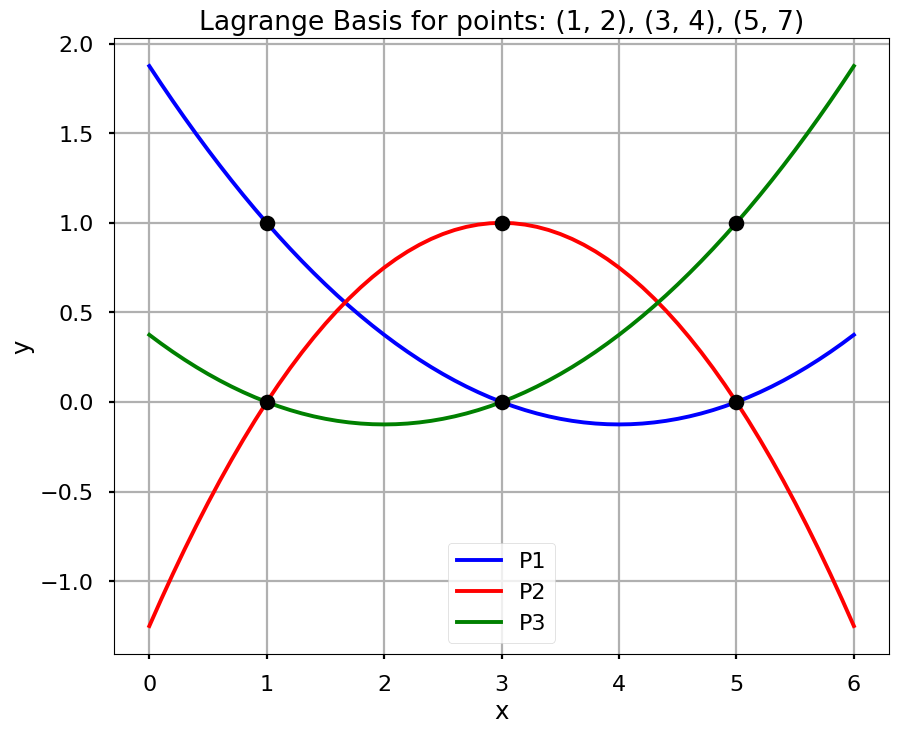

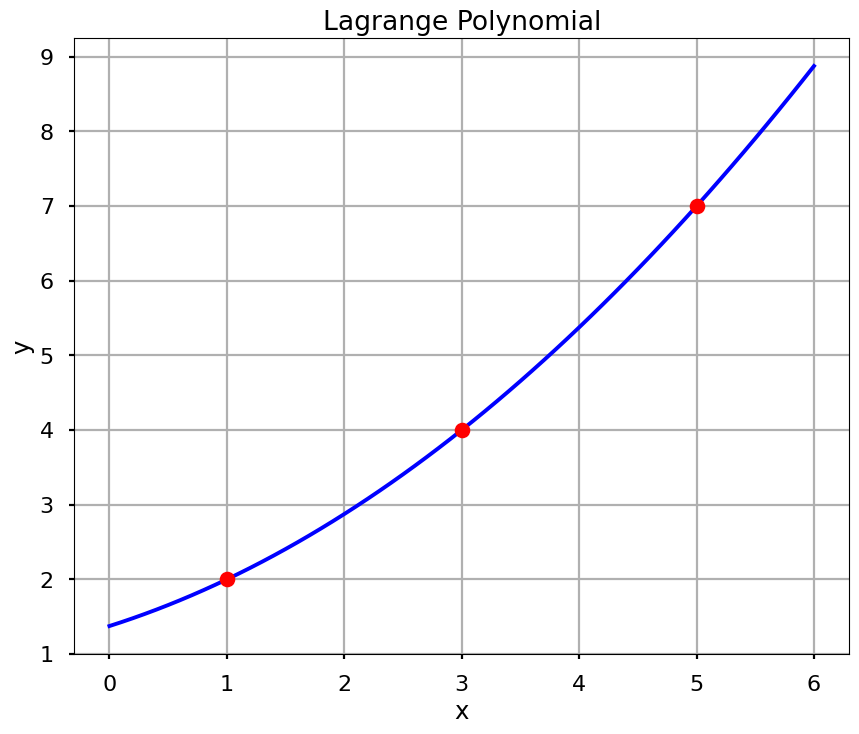

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use("seaborn-poster")

# Data points
x = [1, 3, 5]
y = [2, 4, 7]

# P1: x^2/8 - x + 15/8
# P2: -x^2/4 + 3/2 - 5/4
# P3: x^2/8 -x/2 +3/8
P1_coeff = [15/8, -1, 1/8]
P2_coeff = [-5/4, 6/4, -1/4]
P3_coeff = [3/8, -4/8, 1/8]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(0, 6.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), "b", label = "P1")
plt.plot(x_new, P2(x_new), "r", label = "P2")
plt.plot(x_new, P3(x_new), "g", label = "P3")

plt.plot(x, np.ones(len(x)), "ko", x,np.zeros(len(x)), "ko")
plt.title("Lagrange Basis for points: (1, 2), (3, 4), (5, 7)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

L = 2 * P1 + 4 * P2 + 7 * P3
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), "b", x, y, "ro")
plt.title("Lagrange Polynomial")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**9.** Write a function my_lagrange(x, y, X) where the output Y is the Lagrange interpolation of the data points contained in x and y computed at X. Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don't use the existing lagrange function from SciPy.

First we will need to write a function to compute the basis polynomials. That function would look similar to the pseudo-code below:

In [ ]:
"""
This function will compute the basis polynomials. It takes: index of current data point
(i), the list of x-coordinates from data points (X), and the value to evaluate basis
polynomial at (x)

function lagrangeBasis(i, Xvalues, x):
    ** Initialize basis to 1 **
    basis = 1
    # Iterate through x coordinates points
    for j from 0 to length(Xvalues) - 1:
      # Skipped if j = i (xi - xi)
      if j is not equal to i:
      # Lagrange basis polynomial calculation
      basis = basis * (x - Xvaluesj)/(Xvaluesi - Xvaluesj)
    return basis
"""

Now we will need to build the my_lagrange(x, y, X) function that computers the Lagrange polynomial at points given by X using nested loops. That function would look similar to the pseudo-code below:

In [ ]:
"""
function my_lagrange(x, y, X):
    # Store interpolation values in list Y
    Y = empty list
    # Go through the points in X
    for each point in X:
      # Initialize the Lagrange sum
      SUM = 0
        # Loop through all data points
        from 0 to length(x)-1:
          # Compute the Lagrange interpolation polynomial
          SUM = SUM + (y[i] * lagrangeBasis(i, x, point))
        # Add the computed value to Y
        add SUM to Y
    return Y
"""

# 17.5 Newton's Polynomial Interpolation

Similar to Lagrange interpolation.
Given (x0, y0), (x1, y1), ..., (xn, yn) data points we construct a polynomial function that passes through them.

This method uses divided differences to construct the polynomial

Example. Given data points (1, 3), (2, 9), (3, 10) we can construct Newton's polynomial interpolation function.

Divided difference:

xi | yi | f[xi, xi+1] | f[xi, xi+1, xi+2]

1   | 3   | n/a | n/a

2   | 9    | 3  | n/a

3    | 10  | 1  | (10-9)/(3-2) = 1


P(x) = 3 + 3(x-1) + (x-1)(x-2)

P(x) =  x^2 - x + 2

This polynomial P(x) can now be used to evaluate a point x within the range of data points.

ex. Interpolating x = 1.5: P(1.5) = 2.75

<ipython-input-2-bbc10b0161ea>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


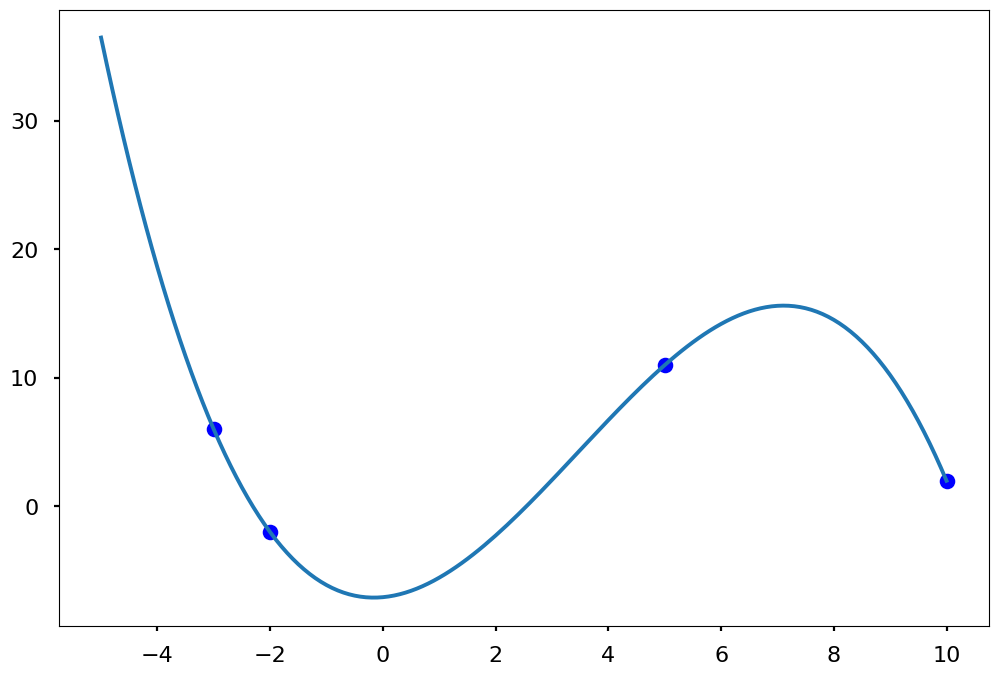

In [2]:
# Calculate the divided difference table for
# x = [-2, -3, 5, 10], y = [-2, 6, 11, 2].
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")
%matplotlib inline

def divided_diff(x, y):
  """
  function to calculate the divided difference table
  """
  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i])
  return coef


def newton_poly(coef, x_data, x):
  """
  evaluate the Newton polynomial at x
  """
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

x = np.array([-2, -3, 5, 10])
y = np.array([-2, 6, 11, 2])

# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 10.1, .1)
y_new = newton_poly(a_s, x, x_new)
plt.figure(figsize = (12, 8))
plt.plot(x, y, "bo")
plt.plot(x_new, y_new)

**10.** Fit the data x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1] using Newton’s polynomial interpolation.

______________________________________________
xi | yi |  f[xi, xi+1] | f[xi, xi+1, xi+2] | f[xi, xi+1, xi+2, xi+3]
______________________________________________
0 | 2 |

1 | 1  | -1

2 | 3 | 1   | 1/2

3 | 5 | 2   | 1/2      | -1/4

4 | 1 | -4    |  -3/2   | -1/4

P(x)=2 - (x-0) - 0.5(x-0)(x-1) - 0.125(x-0)(x-1)(x-2)

P(x) = 2 - (x^3/8) + (3x^2/8) - (3x/4) is the  interpolating polynomial for the given data points.